In [32]:
import pandas as pd
from scipy.stats import mannwhitneyu, spearmanr

In [33]:
# Load the dataset from the Excel file again
df = pd.read_excel("coded_collated_data_.xlsx", sheet_name="coded_collated_data")

# Step 1: Count total contributions per author (each row = 1 contribution)
contributions = df['Author'].value_counts().reset_index()
contributions.columns = ['Author', 'Contributions']

# Step 2: Sort authors by contribution count (descending)
contributions_sorted = contributions.sort_values(by='Contributions', ascending=False).reset_index(drop=True)

# Step 3: Calculate total number of contributors and total contributions
total_contributors = len(contributions_sorted)
total_contributions = contributions_sorted['Contributions'].sum()

# Step 4: Get top 20% contributors
top_20_percent_count = max(1, int(total_contributors * 0.2))  # at least 1 contributor
top_contributors = contributions_sorted.iloc[:top_20_percent_count]

# Step 5: Calculate percentage of total contributions made by top 20% contributors
top_contributions = top_contributors['Contributions'].sum()
pareto_percentage = (top_contributions / total_contributions) * 100

top_20_percent_count, top_contributions, total_contributions, pareto_percentage

(93, np.int64(10501), np.int64(19095), np.float64(54.99345378371301))

Based on the analysis, the top 20% of contributors were responsible for approximately 55% of the total contributions, indicating a moderate level of inequality. However, this falls short of the classic 80/20 distribution, suggesting that the Pareto Principle does not strictly apply to this dataset.

In [34]:
#Hoover index

import numpy as np

# Recalculate contribution share per author
contributions_sorted['Contribution_Share'] = contributions_sorted['Contributions'] / total_contributions

# Equal share if all authors contributed equally
equal_share = 1 / total_contributors

# Calculate Hoover Index
hoover_index = 0.5 * np.sum(np.abs(contributions_sorted['Contribution_Share'] - equal_share))

hoover_index

np.float64(0.39019672435783725)

A Hoover Index of 0.6 or higher would strongly support the 80/20 rule but ours is a mere value of 0.39

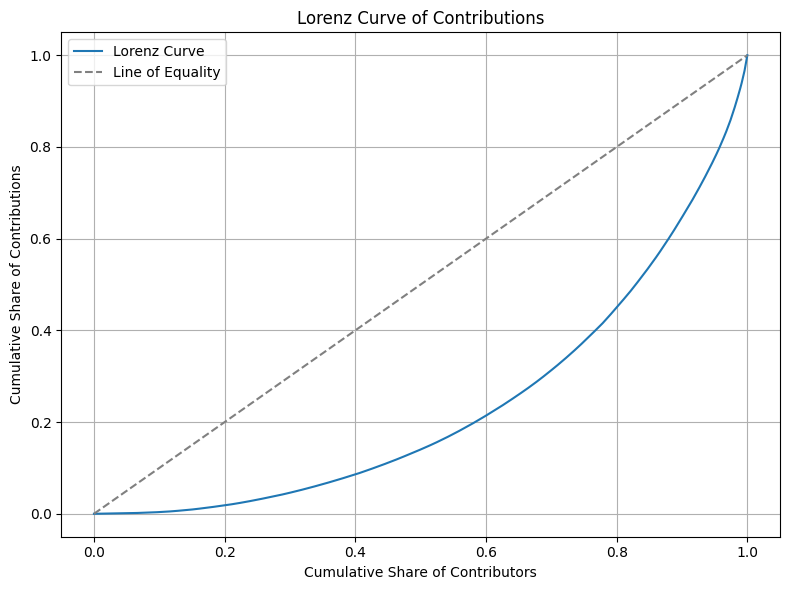

In [35]:
#Lorenz's curve visualization

import matplotlib.pyplot as plt
import numpy as np

# Sort contribution shares in ascending order for Lorenz curve
sorted_shares = np.sort(contributions_sorted['Contribution_Share'].values)

# Compute cumulative share of contributions
cumulative_contributions = np.cumsum(sorted_shares)

# Add a leading 0 for the Lorenz curve
cumulative_contributions = np.insert(cumulative_contributions, 0, 0)
cumulative_contributors = np.linspace(0, 1, len(cumulative_contributions))

# Plot Lorenz Curve
plt.figure(figsize=(8, 6))
plt.plot(cumulative_contributors, cumulative_contributions, label='Lorenz Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Line of Equality')
plt.title("Lorenz Curve of Contributions")
plt.xlabel("Cumulative Share of Contributors")
plt.ylabel("Cumulative Share of Contributions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The curve is moderately below the equality line, confirming that there is inequality, but not extreme enough to suggest a strong Pareto effect (which would show a steeper curve at the beginning).

**CONCLUSION**

*   In educational settings, students are graded on group performance.
*   This creates an incentive for everyone to at least contribute something - even minimal effort.

*   So unlike open-source or corporate projects (where voluntary or role-based imbalances can occur), students may contribute just enough to get credit.


*   If peer reviews are involved, students may fear being called out for slacking. This social pressure can flatten contribution inequality.
*   Someone might do a lot of planning, testing, or mentorship—not always captured in GitHub log.


*   On the flip side, others might submit commits just to appear active, without real impact.







In [36]:
# Group by 'Source' column if it exists (i.e., the file it came from) or by 'Repository' if that's available
group_column = 'Source' if 'Source' in df.columns else 'Repository'

grouped_results = []

# Loop over each group (repo)
for group_name, group_df in df.groupby(group_column):
    contribs = group_df['Author'].value_counts().reset_index()
    contribs.columns = ['Author', 'Contributions']

    total_contributors = len(contribs)
    if total_contributors < 5:
        continue  # skip small groups

    top_20_count = max(1, int(total_contributors * 0.2))
    top_contribs = contribs.sort_values(by='Contributions', ascending=False).iloc[:top_20_count]

    total_contributions = contribs['Contributions'].sum()
    top_contributions = top_contribs['Contributions'].sum()

    share = (top_contributions / total_contributions) * 100

    # Include if near or above 70% contribution share by top 20%
    if share >= 70:
        grouped_results.append({
            group_column: group_name,
            'Top_20%_Share': round(share, 2),
            'Top_Contributors': top_20_count,
            'Total_Contributors': total_contributors
        })

# Convert the results to a DataFrame
pareto_like_groups_df = pd.DataFrame(grouped_results)

# Print the results
print("Repositories that follow the Pareto Principle (Top 20% contributors did >= 70% of the work):")
print(pareto_like_groups_df.to_string(index=False))


Repositories that follow the Pareto Principle (Top 20% contributors did >= 70% of the work):
Repository  Top_20%_Share  Top_Contributors  Total_Contributors
     t0008          80.65                 1                   5
     t0057          72.65                 1                   5
     t0069          71.94                 1                   5


In [37]:
import pandas as pd

# List of repositories to analyze
pareto_repos = ["t0008", "t0057", "t0069"]

# Filter the DataFrame for the selected repositories
filtered_df = df[df['Repository'].isin(pareto_repos)]

# Dictionary to store results
repo_contrib_stats = {}

for repo in pareto_repos:
    repo_data = filtered_df[filtered_df['Repository'] == repo]
    # Count contributions per author
    author_counts = repo_data['Author'].value_counts().reset_index()
    author_counts.columns = ['Author', 'Contributions']
    total_contributions = author_counts['Contributions'].sum()
    # Calculate percentage for each author
    author_counts['Contribution_%'] = round(
        (author_counts['Contributions'] / total_contributions) * 100, 2
    )
    repo_contrib_stats[repo] = author_counts

    # Print results for each repository
    print(f"\nRepository: {repo}")
    print(author_counts.to_string(index=False))


Repository: t0008
Author  Contributions  Contribution_%
 p0229             75           80.65
 p0357             15           16.13
 p0331              1            1.08
 p0075              1            1.08
 p0137              1            1.08

Repository: t0057
Author  Contributions  Contribution_%
 p0239            178           72.65
 p0370             39           15.92
 p0190             15            6.12
 p0115              9            3.67
 p0257              4            1.63

Repository: t0069
Author  Contributions  Contribution_%
 p0069            323           71.94
 p0049             49           10.91
 p0319             37            8.24
 p0267             25            5.57
 p0197             15            3.34


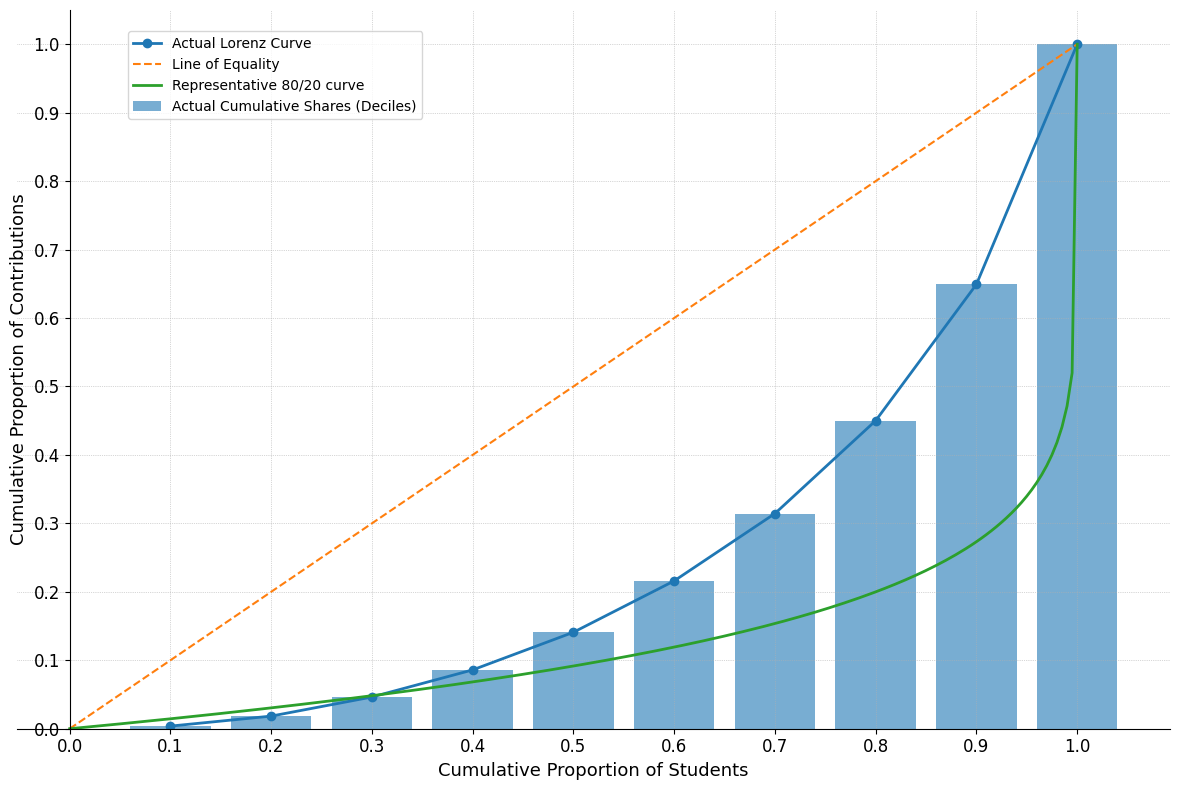

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load your cleaned, anonymized GitHub data:
df = pd.read_excel("coded_collated_data_.xlsx")

# 2) Count contributions per student:
contrib = df['Author'].value_counts().reset_index()
contrib.columns = ['Author', 'Contributions']

# 3) Sort ascending and compute cumulative share for the Lorenz curve:
contrib = contrib.sort_values(by='Contributions', ascending=True).reset_index(drop=True)
contrib['Cumulative'] = contrib['Contributions'].cumsum()
total = contrib['Contributions'].sum()
contrib['CumShare'] = contrib['Cumulative'] / total

# 4) Extract the cumulative share at each 10th percentile:
n = len(contrib)
deciles = np.arange(0.1, 1.1, 0.1)
shares = [contrib.loc[int(np.ceil(n * p)) - 1, 'CumShare'] for p in deciles]

# 5) Build the “true” Pareto curve y = 1 − (1 − x)^0.1386:
x_pareto = np.linspace(0, 1, 200)
y_pareto = 1 - (1 - x_pareto) ** 0.1386

# 6) Plot with adjustments:
fig, ax = plt.subplots(figsize=(12, 8))

# Decile bars
ax.bar(deciles, shares, width=0.08, alpha=0.6, label='Actual Cumulative Shares (Deciles)')

# Observed Lorenz curve
ax.plot(deciles, shares, marker='o', linestyle='-', linewidth=2, label='Actual Lorenz Curve')

# Line of equality
ax.plot([0, 1], [0, 1], linestyle='--', linewidth=1.5, label='Line of Equality')

# Exponential Pareto reference curve
ax.plot(x_pareto, y_pareto, linestyle='-', linewidth=2, label='Representative 80/20 curve')

# Remove title (provided in paper)
# ax.set_title('')

# Labels
ax.set_xlabel('Cumulative Proportion of Students',fontsize=13)
ax.set_ylabel('Cumulative Proportion of Contributions',fontsize=13)

# Force axes to cross at (0,0)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ticks
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.tick_params(axis='both', labelsize=12)


# Legend in upper-left corner after y-axis ticks
ax.legend(loc='upper left', bbox_to_anchor=(0.09, 0.98), frameon=True, fontsize='medium')

# Grid
ax.grid(True, linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

In [45]:
# Compute metrics per team
metrics = []
for repo, group in df.groupby('Repository'):
    counts = group['Author'].value_counts()
    team_size = counts.size
    artifacts = group.shape[0]
    top_n = max(1, int(np.ceil(team_size * 0.2)))
    top_share = counts.iloc[:top_n].sum() / artifacts
    hoover = 0.5 * np.abs((counts / artifacts) - 1/team_size).sum()
    category = 'Pareto' if top_share >= 0.8 else 'Non-Pareto'
    metrics.append({
        'Repository': repo,
        'TeamSize': team_size,
        'Artifacts': artifacts,
        'HooverIndex': hoover,
        'Top20Share': top_share,
        'Category': category
    })

metrics_df = pd.DataFrame(metrics)

# Aggregate statistics by category
stats = metrics_df.groupby('Category').agg(
    n=('Repository', 'count'),
    TeamSize_M=('TeamSize', 'mean'),
    TeamSize_sd=('TeamSize', 'std'),
    Artifacts_M=('Artifacts', 'mean'),
    Artifacts_sd=('Artifacts', 'std'),
    Hoover_M=('HooverIndex', 'mean'),
    Hoover_sd=('HooverIndex', 'std')
).reset_index()

# Print results to console
for _, row in stats.iterrows():
    print(f"{row['Category']}: n={int(row['n'])}, "
          f"TeamSize M={row['TeamSize_M']:.2f} (sd={row['TeamSize_sd']:.2f}), "
          f"Artifacts M={row['Artifacts_M']:.2f} (sd={row['Artifacts_sd']:.2f}), "
          f"Hoover M={row['Hoover_M']:.2f} (sd={row['Hoover_sd']:.2f})")
    
# Compare Pareto vs Non-Pareto trends
size_U, size_p = mannwhitneyu(metrics_df.loc[metrics_df['Category'] == "Pareto", 'TeamSize'].tolist(), 
                    metrics_df.loc[metrics_df['Category'] == "Non-Pareto", 'TeamSize'].tolist())
print("Team Size U: ", size_U, "p= ", size_p)
artifacts_U, artifacts_p = mannwhitneyu(metrics_df.loc[metrics_df['Category'] == "Pareto", 'Artifacts'].tolist(), 
                    metrics_df.loc[metrics_df['Category'] == "Non-Pareto", 'Artifacts'].tolist())
print("Artifacts U: ", artifacts_U, "p= ", artifacts_p)
hoover_U, hoover_p = mannwhitneyu(metrics_df.loc[metrics_df['Category'] == "Pareto", 'HooverIndex'].tolist(), 
                    metrics_df.loc[metrics_df['Category'] == "Non-Pareto", 'HooverIndex'].tolist())
print("Hoover Index U: ", hoover_U, "p= ", hoover_p)
correlation = spearmanr(metrics_df['TeamSize'].tolist(), metrics_df['HooverIndex'])
print("Correlation between team size and hoover index: rho=",correlation.statistic,", p=",correlation.pvalue)


Non-Pareto: n=88, TeamSize M=5.24 (sd=1.53), Artifacts M=207.91 (sd=110.46), Hoover M=0.32 (sd=0.11)
Pareto: n=6, TeamSize M=3.67 (sd=0.82), Artifacts M=133.17 (sd=93.02), Hoover M=0.55 (sd=0.06)
Team Size U:  95.0 p=  0.007698851641129082
Artifacts U:  149.5 p=  0.07784566771205921
Hoover Index U:  512.0 p=  0.00012911152415625456
Correlation between team size and hoover index: rho= 0.29706302323879996 , p= 0.003642897148025091


In [40]:
# after you’ve built metrics_df...
pareto_repos = metrics_df[metrics_df['Category']=='Pareto']
print(pareto_repos[['Repository','TeamSize','Top20Share']])

   Repository  TeamSize  Top20Share
7       t0008         5    0.806452
34      t0035         3    0.880000
43      t0044         4    0.884848
45      t0046         3    0.809524
81      t0082         4    0.830882
90      t0091         3    0.817568


In [41]:
import pandas as pd
import numpy as np

# Load the processed, anonymized data
df = pd.read_excel("coded_collated_data_.xlsx")

# Determine grouping column
group_column = 'Source' if 'Source' in df.columns else 'Repository'

# Identify repositories where top 20% contributed ≥ 70%
selected_repos = []
for name, group in df.groupby(group_column):
    counts = group['Author'].value_counts()
    total = counts.sum()
    top_n = max(1, int(np.ceil(len(counts) * 0.2)))
    if counts.iloc[:top_n].sum() / total >= 0.8:
        selected_repos.append(name)

# Print detailed contributions for each selected repo
for repo in selected_repos:
    group = df[df[group_column] == repo]
    contribs = group['Author'].value_counts().reset_index()
    contribs.columns = ['Author', 'Contributions']
    contribs['Contribution_%'] = (contribs['Contributions'] / contribs['Contributions'].sum()) * 100

    print(f"Repository: {repo}")
    print(contribs.to_string(index=False))
    print()

Repository: t0008
Author  Contributions  Contribution_%
 p0229             75       80.645161
 p0357             15       16.129032
 p0331              1        1.075269
 p0075              1        1.075269
 p0137              1        1.075269

Repository: t0035
Author  Contributions  Contribution_%
 p0119             22            88.0
 p0207              2             8.0
 p0188              1             4.0

Repository: t0044
Author  Contributions  Contribution_%
 p0239            146       88.484848
 p0370             15        9.090909
 p0190              2        1.212121
 p0115              2        1.212121

Repository: t0046
Author  Contributions  Contribution_%
 p0286             68       80.952381
 p0439              9       10.714286
 p0236              7        8.333333

Repository: t0082
Author  Contributions  Contribution_%
 p0254            113       83.088235
 p0077             12        8.823529
 p0249             10        7.352941
 p0219              1        0.7

In [42]:
import pandas as pd
import numpy as np

# Load the processed, anonymized data
# Replace with your actual file path
df = pd.read_excel("coded_collated_data.xlsx")

# Compute metrics per team
metrics = []
for repo, group in df.groupby('Repository'):
    counts = group['Author'].value_counts()
    team_size = counts.size
    artifacts = counts.sum()
    top_n = max(1, int(np.ceil(team_size * 0.2)))
    top_share = counts.iloc[:top_n].sum() / artifacts
    hoover_index = 0.5 * np.abs((counts / artifacts) - 1/team_size).sum()
    metrics.append({
        'Repository': repo,
        'TeamSize': team_size,
        'Artifacts': artifacts,
        'HooverIndex': hoover_index,
        'Top20Share': top_share
    })

metrics_df = pd.DataFrame(metrics)

# Classify teams based on 80/20 threshold
metrics_df['Category'] = np.where(metrics_df['Top20Share'] >= 0.8, 'Pareto', 'Non-Pareto')

# Compute descriptive statistics for each category
stats = metrics_df.groupby('Category').agg(
    n=('Repository', 'count'),
    TeamSize_M=('TeamSize', 'mean'),
    TeamSize_sd=('TeamSize', 'std'),
    Artifacts_M=('Artifacts', 'mean'),
    Artifacts_sd=('Artifacts', 'std'),
    Hoover_M=('HooverIndex', 'mean'),
    Hoover_sd=('HooverIndex', 'std')
).reset_index()

# Print results to console
for _, row in stats.iterrows():
    print(f"{row['Category']}: n={int(row['n'])}, "
          f"TeamSize M={row['TeamSize_M']:.2f} (sd={row['TeamSize_sd']:.2f}), "
          f"Artifacts M={row['Artifacts_M']:.2f} (sd={row['Artifacts_sd']:.2f}), "
          f"Hoover M={row['Hoover_M']:.2f} (sd={row['Hoover_sd']:.2f})")

Non-Pareto: n=88, TeamSize M=5.24 (sd=1.53), Artifacts M=207.91 (sd=110.46), Hoover M=0.32 (sd=0.11)
Pareto: n=6, TeamSize M=3.67 (sd=0.82), Artifacts M=133.17 (sd=93.02), Hoover M=0.55 (sd=0.06)


In [43]:
import pandas as pd

# Load the processed, anonymized data
df = pd.read_excel("coded_collated_data_.xlsx")  # Adjust path as needed

# Count the total number of unique teams (repositories)
total_teams = df['Repository'].nunique()

print(f"Total teams in the dataset: {total_teams}")

Total teams in the dataset: 94
